# Import libraries

In [3]:
!pip install scikit-learn

     ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
     --------------------------------------- 0.0/10.7 MB 660.6 kB/s eta 0:00:17
     --------------------------------------- 0.0/10.7 MB 393.8 kB/s eta 0:00:28
     --------------------------------------- 0.1/10.7 MB 469.7 kB/s eta 0:00:23
     --------------------------------------- 0.1/10.7 MB 525.1 kB/s eta 0:00:21
     --------------------------------------- 0.1/10.7 MB 420.8 kB/s eta 0:00:26
      -------------------------------------- 0.2/10.7 MB 615.9 kB/s eta 0:00:18
      -------------------------------------- 0.2/10.7 MB 557.9 kB/s eta 0:00:19
      -------------------------------------- 0.2/10.7 MB 573.4 kB/s eta 0:00:19
      -------------------------------------- 0.2/10.7 MB 573.4 kB/s eta 0:00:19
     - ------------------------------------- 0.3/10.7 MB 633.2 kB/s eta 0:00:17
     - ------------------------------------- 0.3/10.7 MB 677.0 kB/s eta 0:00:16
     - ------------------------------------- 0.3


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset

In [13]:
df = pd.read_csv("C:/Users/98939/Downloads/MASTER_DATASET.csv")  
df.head()

,Timestamp,Time,Pressure_In,Temperature_In,Flow_Rate,Pressure_Out,Temperature_Out,Efficiency,Power_Consumption,Vibration,...,Velocity,Viscosity,Phase_Angle,vib_min,vib_rms,Pressure_In_Filtered,Temperature_In_Filtered,Label,Flow_Rate_Filtered,Vibration_Filtered
0,2025-01-01 00:00:00,0,3.524836,25.880595,12.156184,17.436829,203.077815,0.813001,5803.345268,1.151771,...,30.063063,0.00001,183.382071,0.523325,1.151771,3.524836,25.880595,1.0,12.156184,1.151771
1,2025-01-01 00:00:01,1,3.503083,23.692395,12.010572,17.406759,197.494853,0.823139,5554.713072,1.010584,...,31.895808,0.00001,183.198709,0.523325,1.010584,3.511784,24.567675,0.0,12.068817,1.067059
2,2025-01-01 00:00:02,2,3.552351,25.416440,11.907004,17.954038,203.341908,0.820196,5657.678081,0.949326,...,31.005970,0.00001,183.712548,0.523325,0.949326,3.536748,25.089992,0.0,11.969240,0.994608
3,2025-01-01 00:00:03,3,3.606039,24.210525,11.920992,18.213320,201.438404,0.819783,5644.959322,1.079461,...,30.242627,0.00001,180.863281,0.523325,1.079461,3.579546,24.546792,0.0,11.939440,1.047017
4,2025-01-01 00:00:04,4,3.528026,24.486640,12.045394,17.854835,200.631142,0.825436,5630.174826,1.068124,...,29.277585,0.00001,184.095677,0.523325,1.068124,3.547708,24.509620,0.0,12.004917,1.060061


# Data Preprocessing

We drop non-numeric or identifier columns (like timestamps or labels), and scale the features using StandardScaler.
PCA is sensitive to feature scale, so standardization is necessary.

In [14]:
# Drop any rows that contain missing values
df_clean = df.dropna()

# Drop non-numeric columns
features = df_clean.drop(columns=['timestamp', 'ID'], errors='ignore')

# Keep only numeric features
features = features.select_dtypes(include=[np.number])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Apply PCA

We apply PCA to reduce the dimensionality of the dataset and analyze the explained variance for each principal component.

In [15]:
# Initialize PCA
pca = PCA()

# Fit PCA on the scaled data
pca.fit(X_scaled)

# Transform the data
X_pca = pca.transform(X_scaled)

# Create a DataFrame of the principal components
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Explained Variance Analysis

We analyze how much variance is captured by each principal component to determine how many components to keep.
This helps us identify the "elbow" point in the scree plot.

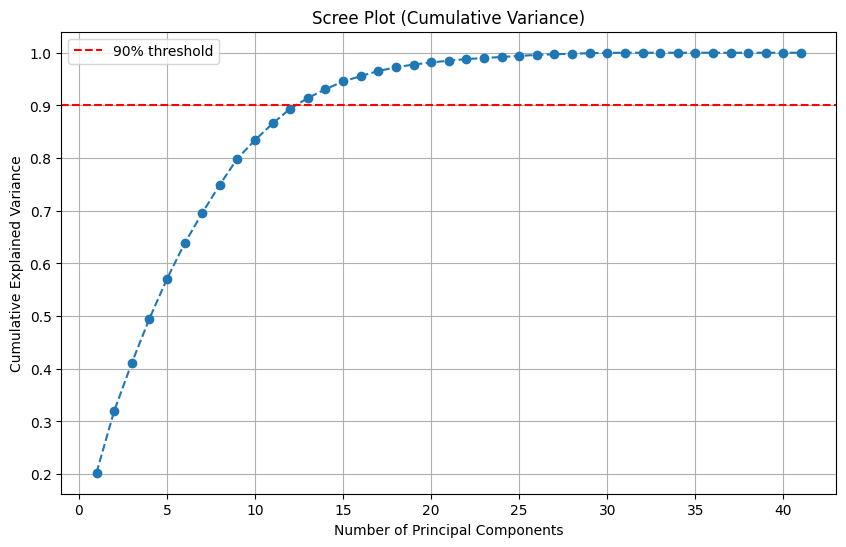

In [16]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot (Cumulative Variance)')
plt.grid(True)
plt.axhline(y=0.9, color='red', linestyle='--', label='90% threshold')
plt.legend()
plt.show()

# PCA Component Loadings (Feature Contributions)

We examine which original features contribute most to each principal component.
This helps in interpreting what each PC represents.

In [17]:
# Get PCA component loadings
loadings = pd.DataFrame(pca.components_.T,
                        columns=[f'PC{i+1}' for i in range(len(features.columns))],
                        index=features.columns)

# Display top contributors to first 3 components
for i in range(3):
    print(f"\nTop features for PC{i+1}:")
    print(loadings.iloc[:, i].abs().sort_values(ascending=False).head(5))



Top features for PC1:
Viscosity              0.357063
Phase_Angle            0.350068
Ambient_Temperature    0.347277
Density                0.347011
Fuel_Quality           0.347002
Name: PC1, dtype: float64

Top features for PC2:
Damping                0.456190
Maintenance_Quality    0.456137
Mass                   0.456079
Air_Pollution          0.413032
Stiffness              0.411427
Name: PC2, dtype: float64

Top features for PC3:
Velocity                   0.386680
Frequency                  0.386559
Humidity                   0.385212
Temperature_In_Filtered    0.356277
Anomaly_Score              0.277714
Name: PC3, dtype: float64


# Visualize the First Two Principal Components

We can now visualize the data in 2D space using the first two principal components.  
If you have labels (like status/failure), you can color-code them.

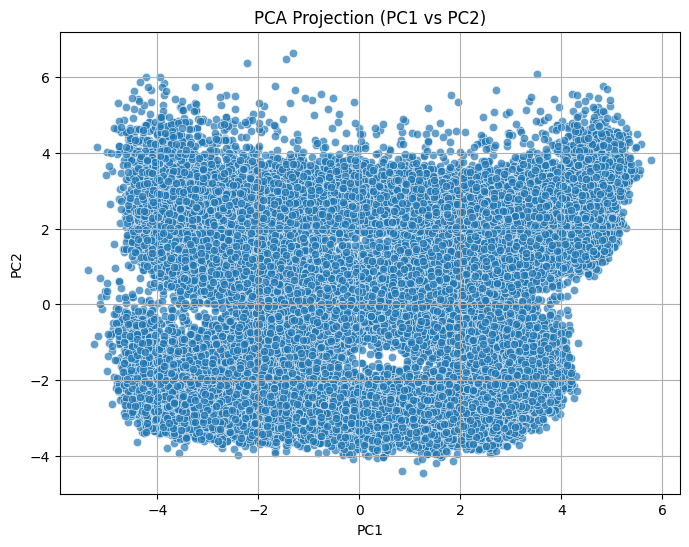

In [18]:
# Optional: Add labels if available
# Example: pca_df['label'] = df['Failure_Label']

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', alpha=0.7)
plt.title('PCA Projection (PC1 vs PC2)')
plt.grid(True)
plt.show()

# Determine the optimal number of components

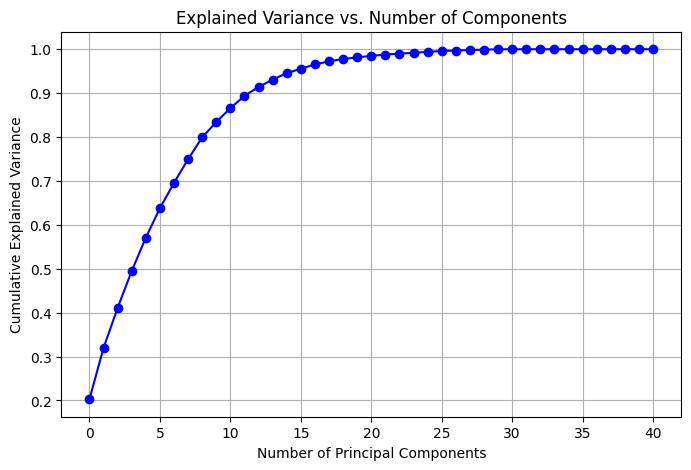

In [19]:
# Plot cumulative explained variance to decide how many PCs to keep

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', color='blue')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()


# Compute reconstruction error

In [22]:
# ignore non-numerical features
X = df.select_dtypes(include=np.number)

# remove NAN
X_clean = X.dropna()
df_clean = df.loc[X_clean.index]

# Project data into PCA space (reduced dimensions)
X_scaled = scaler.fit_transform(X_clean)
X_pca = pca.transform(X_scaled)

# Reconstruct data back to original space
X_reconstructed = pca.inverse_transform(X_pca)

# Compute reconstruction error (Euclidean distance)
reconstruction_error = np.mean((X_scaled - X_reconstructed)**2, axis=1)

# Add this error to the dataframe
df_clean['Reconstruction_Error'] = reconstruction_error


# Set threshold for gross error detection

In [24]:
# Example: Set threshold as 95th percentile
threshold = np.percentile(reconstruction_error, 95)

# Flag gross errors
df['Gross_Error'] = df_clean['Reconstruction_Error'] > threshold

# How many gross errors?
print(f"Detected {df['Gross_Error'].sum()} gross errors out of {len(df)} records.")


Detected 4998 gross errors out of 100000 records.


# Visualize gross errors

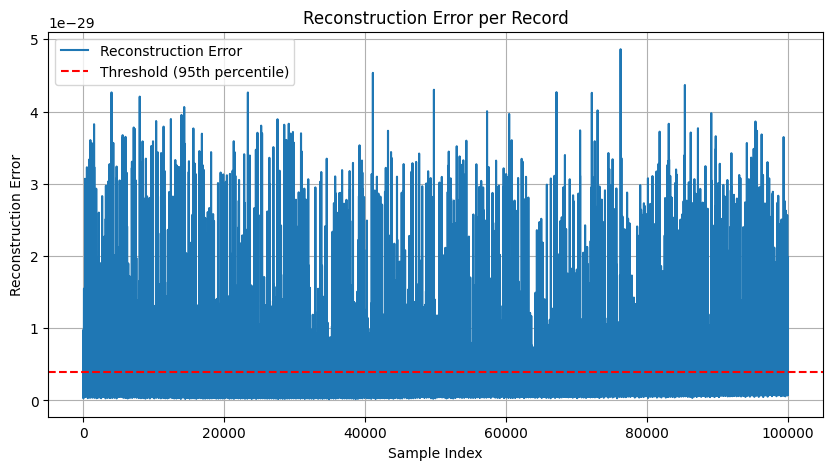

In [26]:
plt.figure(figsize=(10,5))
plt.plot(df_clean['Reconstruction_Error'], label='Reconstruction Error')
plt.axhline(threshold, color='red', linestyle='--', label='Threshold (95th percentile)')
plt.title('Reconstruction Error per Record')
plt.xlabel('Sample Index')
plt.ylabel('Reconstruction Error')
plt.legend()
plt.grid(True)
plt.show()
